In [ ]:
!pip install optuna
!pip install transformers
!pip install SentencePiece

     |████████████████████████████████| 308 kB 5.4 MB/s 
     |████████████████████████████████| 80 kB 9.8 MB/s 
     |████████████████████████████████| 208 kB 58.2 MB/s 
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 111 kB 59.3 MB/s 
     |████████████████████████████████| 144 kB 62.6 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=087d3c26c311f4e0eab08059aa91210d543ddf6e84f2d43845c3d758a09d0028
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 636 kB 59.1 MB/s 
     |████████████████████████████████| 895 kB 57.7 MB/s 
     |████████████████████████████████| 3.3 MB 45.9 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████

In [ ]:
import tensorflow as tf

# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.94.105.226:8470
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.94.105.226:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.94.105.226:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


REPLICAS:  8


# **Q1**

In [ ]:
import pandas as pd
import numpy as np
import re
from transformers import *
import random

In [ ]:
# train
!gdown --id 1lct2GyNPE2UwI8geGXRha6j1yU8tksSw

# valid
!gdown --id 13wDQLk8mXorxghxWFNfhWvXPWPPI27dL

# test
!gdown --id 1St87-nfaqT5ZyiaDRY_NPy8PbRdTEPAY

Downloading...
From: https://drive.google.com/uc?id=1lct2GyNPE2UwI8geGXRha6j1yU8tksSw
To: /content/train.csv
20.1MB [00:00, 123MB/s]
Downloading...
From: https://drive.google.com/uc?id=13wDQLk8mXorxghxWFNfhWvXPWPPI27dL
To: /content/valid.csv
100% 1.87M/1.87M [00:00<00:00, 59.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1St87-nfaqT5ZyiaDRY_NPy8PbRdTEPAY
To: /content/test.csv
100% 1.81M/1.81M [00:00<00:00, 57.6MB/s]


In [ ]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

In [ ]:
MODEL_NAME = 'bert-base-uncased'
MAX_LEN = 64

In [ ]:
def prepare_dataset(data, tokenizer, max_len):

  ids = []
  masks = []
  labels = []
  token_ids = []

  labels = []
  
  for row in data.itertuples():
    text = row.Input + ' [SEP] ' + row.Output
    inputs = tokenizer(text, None, max_length=max_len, padding='max_length', truncation=True, return_attention_mask=True, return_token_type_ids=True, add_special_tokens=True)
    ids.append(inputs['input_ids'])
    masks.append(inputs['attention_mask'])
    token_ids.append(inputs['token_type_ids'])

    labels.append(row.Label)

  return {
      'input_ids': ids,
      'attention_mask': masks,
      'token_type_ids': token_ids,
      'labels': labels
      }

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

training_set = prepare_dataset(train, tokenizer, MAX_LEN)
validating_set = prepare_dataset(valid, tokenizer, MAX_LEN)
testting_set = prepare_dataset(test, tokenizer, MAX_LEN)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import * 
from tensorflow.keras import optimizers, losses, layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [ ]:
def get_model(MAX_LEN, MODEL_NAME):

  input_ids = Input(shape=(MAX_LEN,), dtype=tf.int32)
  attention_mask = Input(shape=(MAX_LEN,), dtype=tf.int32)
  token_type_ids = Input(shape=(MAX_LEN,), dtype=tf.int32)
    
  encoder = TFAutoModel.from_pretrained(MODEL_NAME, return_dict=True)

  pooler_outputs = encoder({"input_ids": input_ids, "token_type_ids": token_type_ids, "attention_mask": attention_mask}, training=True).pooler_output

  dense_layer = Dense(256, activation='relu', name='dense_layer1')(pooler_outputs)
  dropout = Dropout(0.25)(dense_layer)
  output = Dense(1, activation='sigmoid')(dropout)
    
  model = Model(inputs=[input_ids, attention_mask, token_type_ids], outputs=output)

  optimizer = optimizers.Adam(lr=2e-5)
  loss = losses.binary_crossentropy

  model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
  
  return model

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `l

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 64)]         0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_2[0][0]                    
                                                                 input_1[0][0]                

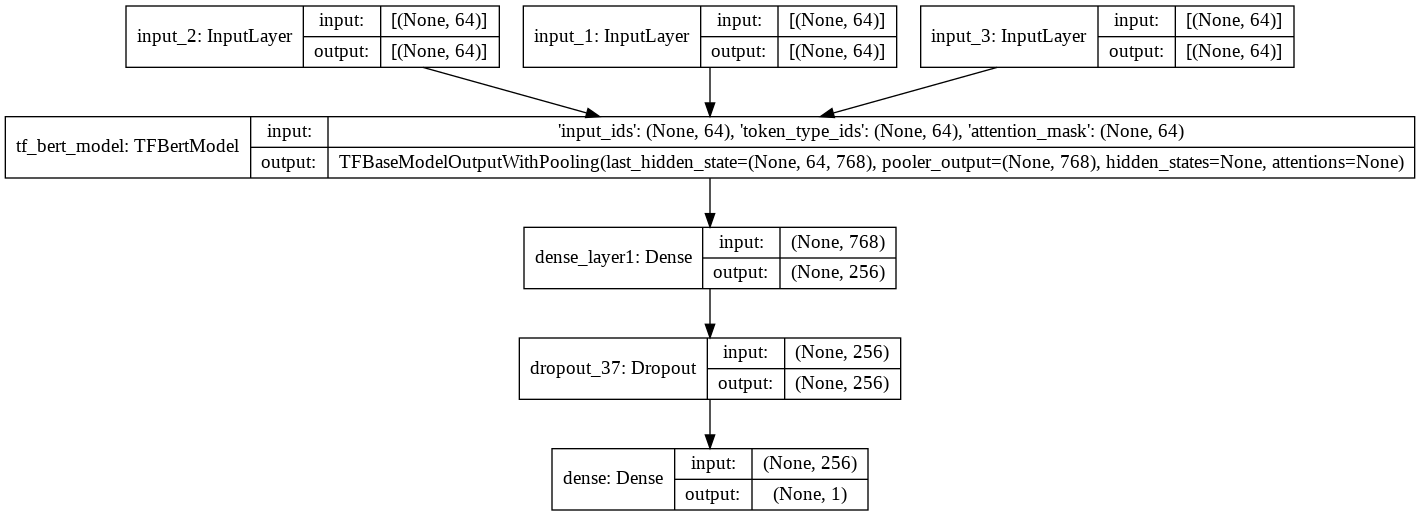

In [ ]:
with strategy.scope():
  model = get_model(MAX_LEN, MODEL_NAME)

model.summary()

tf.keras.utils.plot_model(model, to_file='./model.png', show_shapes=True)

In [ ]:
x_train = [np.array(training_set['input_ids'], dtype=int), np.array(training_set['attention_mask'], dtype=int), np.array(training_set['token_type_ids'], dtype=int)]
x_valid = [np.array(validating_set['input_ids'], dtype=int), np.array(validating_set['attention_mask'], dtype=int), np.array(validating_set['token_type_ids'], dtype=int)]
x_test = [np.array(testting_set['input_ids'], dtype=int), np.array(testting_set['attention_mask'], dtype=int), np.array(testting_set['token_type_ids'], dtype=int)]

y_train = train.Label
y_valid = valid.Label
y_test = test.Label

In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_data = (x_valid, y_valid),
    epochs=3,
    verbose=1,
    batch_size=32)

Epoch 1/3


INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]
INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


4754/4754 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.8435

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_3:0' shape=(None,) dtype=int64>]


4754/4754 [==============================] - 456s 79ms/step - loss: 0.3384 - accuracy: 0.8435 - val_loss: 0.2874 - val_accuracy: 0.8747
Epoch 2/3
4754/4754 [==============================] - 318s 67ms/step - loss: 0.1972 - accuracy: 0.9181 - val_loss: 0.2811 - val_accuracy: 0.8798
Epoch 3/3
4754/4754 [==============================] - 316s 67ms/step - loss: 0.1187 - accuracy: 0.9521 - val_loss: 0.3278 - val_accuracy: 0.8810


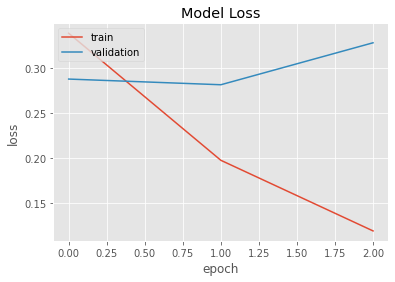

In [ ]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

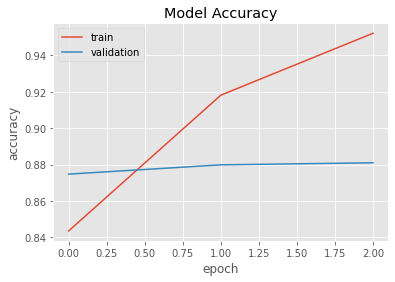

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x_test)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 64) dtype=int64>, <tf.Tensor 'cond_8/Identity_2:0' shape=(None, 64) dtype=int64>]


In [ ]:
import optuna

def objective(trial):

  sig_threshold = trial.suggest_float("sig_threshold", 0.0, 1.0)
  print("sig_threshold", sig_threshold)

  pred_labels = [1 if predictions[i] > sig_threshold else 0 for i in range(len(testting_set['labels']))]

  acc = accuracy_score(testting_set['labels'], pred_labels)
  print("acc", acc)

  return acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2021-10-05 13:19:31,959] A new study created in memory with name: no-name-1a5e68cb-384a-4a4a-94ca-9cb707e4ce48
[I 2021-10-05 13:19:32,007] Trial 0 finished with value: 0.8719584569732938 and parameters: {'sig_threshold': 0.22949403042797212}. Best is trial 0 with value: 0.8719584569732938.
[I 2021-10-05 13:19:32,046] Trial 1 finished with value: 0.8659495548961424 and parameters: {'sig_threshold': 0.17630886935296985}. Best is trial 0 with value: 0.8719584569732938.
[I 2021-10-05 13:19:32,083] Trial 2 finished with value: 0.8301186943620178 and parameters: {'sig_threshold': 0.03831039169529282}. Best is trial 0 with value: 0.8719584569732938.
[I 2021-10-05 13:19:32,120] Trial 3 finished with value: 0.8850890207715133 and parameters: {'sig_threshold': 0.5534431951124599}. Best is trial 3 with value: 0.8850890207715133.
[I 2021-10-05 13:19:32,154] Trial 4 finished with value: 0.8841988130563798 and parameters: {'sig_threshold': 0.46235188686278617}. Best is trial 3 with value: 0.88508

sig_threshold 0.22949403042797212
acc 0.8719584569732938
sig_threshold 0.17630886935296985
acc 0.8659495548961424
sig_threshold 0.03831039169529282
acc 0.8301186943620178
sig_threshold 0.5534431951124599
acc 0.8850890207715133
sig_threshold 0.46235188686278617
acc 0.8841988130563798
sig_threshold 0.002164806188298174


[I 2021-10-05 13:19:32,194] Trial 5 finished with value: 0.7328635014836795 and parameters: {'sig_threshold': 0.002164806188298174}. Best is trial 3 with value: 0.8850890207715133.
[I 2021-10-05 13:19:32,229] Trial 6 finished with value: 0.8247774480712167 and parameters: {'sig_threshold': 0.03191461254064398}. Best is trial 3 with value: 0.8850890207715133.
[I 2021-10-05 13:19:32,263] Trial 7 finished with value: 0.8863501483679526 and parameters: {'sig_threshold': 0.7376784128112917}. Best is trial 7 with value: 0.8863501483679526.
[I 2021-10-05 13:19:32,300] Trial 8 finished with value: 0.8813056379821959 and parameters: {'sig_threshold': 0.35266053322543767}. Best is trial 7 with value: 0.8863501483679526.
[I 2021-10-05 13:19:32,334] Trial 9 finished with value: 0.8793768545994065 and parameters: {'sig_threshold': 0.2984051084209426}. Best is trial 7 with value: 0.8863501483679526.
[I 2021-10-05 13:19:32,388] Trial 10 finished with value: 0.8738872403560831 and parameters: {'sig_th

acc 0.7328635014836795
sig_threshold 0.03191461254064398
acc 0.8247774480712167
sig_threshold 0.7376784128112917
acc 0.8863501483679526
sig_threshold 0.35266053322543767
acc 0.8813056379821959
sig_threshold 0.2984051084209426
acc 0.8793768545994065
sig_threshold 0.8717526650712526
acc 0.8738872403560831
sig_threshold 0.7548504603930947


[I 2021-10-05 13:19:32,428] Trial 11 finished with value: 0.8856824925816024 and parameters: {'sig_threshold': 0.7548504603930947}. Best is trial 7 with value: 0.8863501483679526.
[I 2021-10-05 13:19:32,466] Trial 12 finished with value: 0.8839762611275964 and parameters: {'sig_threshold': 0.7851844275146432}. Best is trial 7 with value: 0.8863501483679526.
[I 2021-10-05 13:19:32,505] Trial 13 finished with value: 0.8871661721068249 and parameters: {'sig_threshold': 0.6842391477231423}. Best is trial 13 with value: 0.8871661721068249.
[I 2021-10-05 13:19:32,546] Trial 14 finished with value: 0.8875370919881306 and parameters: {'sig_threshold': 0.6050553623940037}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,588] Trial 15 finished with value: 0.8861275964391692 and parameters: {'sig_threshold': 0.5748591975237594}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,624] Trial 16 finished with value: 0.7434718100890207 and parameters: {'si

acc 0.8856824925816024
sig_threshold 0.7851844275146432
acc 0.8839762611275964
sig_threshold 0.6842391477231423
acc 0.8871661721068249
sig_threshold 0.6050553623940037
acc 0.8875370919881306
sig_threshold 0.5748591975237594
acc 0.8861275964391692
sig_threshold 0.9935726600785686
acc 0.7434718100890207
sig_threshold 0.6393473388752365


[I 2021-10-05 13:19:32,662] Trial 17 finished with value: 0.8863501483679526 and parameters: {'sig_threshold': 0.6393473388752365}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,698] Trial 18 finished with value: 0.8827151335311573 and parameters: {'sig_threshold': 0.3972851290514321}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,737] Trial 19 finished with value: 0.8867210682492581 and parameters: {'sig_threshold': 0.6214841438063289}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,775] Trial 20 finished with value: 0.8748516320474777 and parameters: {'sig_threshold': 0.8631940272184864}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,817] Trial 21 finished with value: 0.8862017804154303 and parameters: {'sig_threshold': 0.6519328874153223}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,855] Trial 22 finished with value: 0.8864985163204748 and parameters: {'

acc 0.8863501483679526
sig_threshold 0.3972851290514321
acc 0.8827151335311573
sig_threshold 0.6214841438063289
acc 0.8867210682492581
sig_threshold 0.8631940272184864
acc 0.8748516320474777
sig_threshold 0.6519328874153223
acc 0.8862017804154303
sig_threshold 0.6439104971351809
acc 0.8864985163204748
sig_threshold 0.48414750777281684


[I 2021-10-05 13:19:32,897] Trial 23 finished with value: 0.8844955489614243 and parameters: {'sig_threshold': 0.48414750777281684}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,933] Trial 24 finished with value: 0.885459940652819 and parameters: {'sig_threshold': 0.5590831598261123}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:32,969] Trial 25 finished with value: 0.8873145400593472 and parameters: {'sig_threshold': 0.6752211484204499}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,007] Trial 26 finished with value: 0.8784124629080119 and parameters: {'sig_threshold': 0.8382889792013613}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,045] Trial 27 finished with value: 0.8863501483679526 and parameters: {'sig_threshold': 0.7115921591064305}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,084] Trial 28 finished with value: 0.8548961424332344 and parameters: {'

acc 0.8844955489614243
sig_threshold 0.5590831598261123
acc 0.885459940652819
sig_threshold 0.6752211484204499
acc 0.8873145400593472
sig_threshold 0.8382889792013613
acc 0.8784124629080119
sig_threshold 0.7115921591064305
acc 0.8863501483679526
sig_threshold 0.930045945101177
acc 0.8548961424332344
sig_threshold 0.4288977010638711


[I 2021-10-05 13:19:33,128] Trial 29 finished with value: 0.8834569732937686 and parameters: {'sig_threshold': 0.4288977010638711}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,168] Trial 30 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.5291277564634413}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,203] Trial 31 finished with value: 0.8870178041543026 and parameters: {'sig_threshold': 0.6862002199117618}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,241] Trial 32 finished with value: 0.8869436201780415 and parameters: {'sig_threshold': 0.6974389579586266}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,276] Trial 33 finished with value: 0.8804154302670623 and parameters: {'sig_threshold': 0.8131345892406612}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,312] Trial 34 finished with value: 0.887240356083086 and parameters: {'s

acc 0.8834569732937686
sig_threshold 0.5291277564634413
acc 0.8847922848664689
sig_threshold 0.6862002199117618
acc 0.8870178041543026
sig_threshold 0.6974389579586266
acc 0.8869436201780415
sig_threshold 0.8131345892406612
acc 0.8804154302670623
sig_threshold 0.680967619886876
acc 0.887240356083086
sig_threshold 0.5868419998527324


[I 2021-10-05 13:19:33,352] Trial 35 finished with value: 0.8868694362017804 and parameters: {'sig_threshold': 0.5868419998527324}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,387] Trial 36 finished with value: 0.8853115727002967 and parameters: {'sig_threshold': 0.4962021501489705}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,427] Trial 37 finished with value: 0.8856083086053412 and parameters: {'sig_threshold': 0.7595319489927176}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,465] Trial 38 finished with value: 0.8735163204747775 and parameters: {'sig_threshold': 0.24128549299716262}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,502] Trial 39 finished with value: 0.8632047477744808 and parameters: {'sig_threshold': 0.9144696945025963}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,548] Trial 40 finished with value: 0.8560830860534124 and parameters: {

acc 0.8868694362017804
sig_threshold 0.4962021501489705
acc 0.8853115727002967
sig_threshold 0.7595319489927176
acc 0.8856083086053412
sig_threshold 0.24128549299716262
acc 0.8735163204747775
sig_threshold 0.9144696945025963
acc 0.8632047477744808
sig_threshold 0.1060962878706656
acc 0.8560830860534124
sig_threshold 0.6858500312700013


[I 2021-10-05 13:19:33,588] Trial 41 finished with value: 0.8870919881305638 and parameters: {'sig_threshold': 0.6858500312700013}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,630] Trial 42 finished with value: 0.8871661721068249 and parameters: {'sig_threshold': 0.6816604851042423}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,668] Trial 43 finished with value: 0.8874629080118694 and parameters: {'sig_threshold': 0.6052868590514943}. Best is trial 14 with value: 0.8875370919881306.
[I 2021-10-05 13:19:33,707] Trial 44 finished with value: 0.887759643916914 and parameters: {'sig_threshold': 0.6119053114350225}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:33,745] Trial 45 finished with value: 0.887759643916914 and parameters: {'sig_threshold': 0.6104439360828924}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:33,787] Trial 46 finished with value: 0.8850148367952523 and parameters: {'sig_

acc 0.8870919881305638
sig_threshold 0.6816604851042423
acc 0.8871661721068249
sig_threshold 0.6052868590514943
acc 0.8874629080118694
sig_threshold 0.6119053114350225
acc 0.887759643916914
sig_threshold 0.6104439360828924
acc 0.887759643916914
sig_threshold 0.5262539480933417
acc 0.8850148367952523


[I 2021-10-05 13:19:33,833] Trial 47 finished with value: 0.8870178041543026 and parameters: {'sig_threshold': 0.5988679079332488}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:33,876] Trial 48 finished with value: 0.8836053412462908 and parameters: {'sig_threshold': 0.43726215036332516}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:33,916] Trial 49 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.5347379904166996}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:33,954] Trial 50 finished with value: 0.8815281899109793 and parameters: {'sig_threshold': 0.3609716819110794}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:33,991] Trial 51 finished with value: 0.8856824925816024 and parameters: {'sig_threshold': 0.7538217876957671}. Best is trial 44 with value: 0.887759643916914.


sig_threshold 0.5988679079332488
acc 0.8870178041543026
sig_threshold 0.43726215036332516
acc 0.8836053412462908
sig_threshold 0.5347379904166996
acc 0.8847922848664689
sig_threshold 0.3609716819110794
acc 0.8815281899109793
sig_threshold 0.7538217876957671
acc 0.8856824925816024
sig_threshold 0.6017317547515225


[I 2021-10-05 13:19:34,041] Trial 52 finished with value: 0.8869436201780415 and parameters: {'sig_threshold': 0.6017317547515225}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,083] Trial 53 finished with value: 0.8859792284866469 and parameters: {'sig_threshold': 0.7251346463302368}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,123] Trial 54 finished with value: 0.8863501483679526 and parameters: {'sig_threshold': 0.6426394339943169}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,164] Trial 55 finished with value: 0.8835311572700296 and parameters: {'sig_threshold': 0.7962443738593772}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,202] Trial 56 finished with value: 0.8858308605341246 and parameters: {'sig_threshold': 0.5672060614625558}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,242] Trial 57 finished with value: 0.8862759643916914 and parameters: {'sig_t

acc 0.8869436201780415
sig_threshold 0.7251346463302368
acc 0.8859792284866469
sig_threshold 0.6426394339943169
acc 0.8863501483679526
sig_threshold 0.7962443738593772
acc 0.8835311572700296
sig_threshold 0.5672060614625558
acc 0.8858308605341246
sig_threshold 0.6563594626635699
acc 0.8862759643916914


[I 2021-10-05 13:19:34,287] Trial 58 finished with value: 0.8874629080118694 and parameters: {'sig_threshold': 0.614340460245687}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,325] Trial 59 finished with value: 0.8841988130563798 and parameters: {'sig_threshold': 0.46151145101006696}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,363] Trial 60 finished with value: 0.8875370919881306 and parameters: {'sig_threshold': 0.6054992263153971}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,403] Trial 61 finished with value: 0.8873145400593472 and parameters: {'sig_threshold': 0.6175943667258387}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,444] Trial 62 finished with value: 0.887759643916914 and parameters: {'sig_threshold': 0.6103983275386982}. Best is trial 44 with value: 0.887759643916914.


sig_threshold 0.614340460245687
acc 0.8874629080118694
sig_threshold 0.46151145101006696
acc 0.8841988130563798
sig_threshold 0.6054992263153971
acc 0.8875370919881306
sig_threshold 0.6175943667258387
acc 0.8873145400593472
sig_threshold 0.6103983275386982
acc 0.887759643916914
sig_threshold 0.5434938086211366


[I 2021-10-05 13:19:34,488] Trial 63 finished with value: 0.88486646884273 and parameters: {'sig_threshold': 0.5434938086211366}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,527] Trial 64 finished with value: 0.8864985163204748 and parameters: {'sig_threshold': 0.5802502428384259}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,574] Trial 65 finished with value: 0.8852373887240356 and parameters: {'sig_threshold': 0.4981931054746631}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,619] Trial 66 finished with value: 0.8870178041543026 and parameters: {'sig_threshold': 0.6201263421994784}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,660] Trial 67 finished with value: 0.8856083086053412 and parameters: {'sig_threshold': 0.5595665224113942}. Best is trial 44 with value: 0.887759643916914.


acc 0.88486646884273
sig_threshold 0.5802502428384259
acc 0.8864985163204748
sig_threshold 0.4981931054746631
acc 0.8852373887240356
sig_threshold 0.6201263421994784
acc 0.8870178041543026
sig_threshold 0.5595665224113942
acc 0.8856083086053412
sig_threshold 0.7253012149301441


[I 2021-10-05 13:19:34,705] Trial 68 finished with value: 0.8859792284866469 and parameters: {'sig_threshold': 0.7253012149301441}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,745] Trial 69 finished with value: 0.8841246290801187 and parameters: {'sig_threshold': 0.46361227949127404}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,784] Trial 70 finished with value: 0.8864985163204748 and parameters: {'sig_threshold': 0.6433161293415696}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,822] Trial 71 finished with value: 0.8867210682492581 and parameters: {'sig_threshold': 0.6217970188860066}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,860] Trial 72 finished with value: 0.8873887240356083 and parameters: {'sig_threshold': 0.6726297059309614}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,903] Trial 73 finished with value: 0.8852373887240356 and parameters: {'sig_

acc 0.8859792284866469
sig_threshold 0.46361227949127404
acc 0.8841246290801187
sig_threshold 0.6433161293415696
acc 0.8864985163204748
sig_threshold 0.6217970188860066
acc 0.8867210682492581
sig_threshold 0.6726297059309614
acc 0.8873887240356083
sig_threshold 0.521278708605228
acc 0.8852373887240356
sig_threshold 0.5934418775320401


[I 2021-10-05 13:19:34,946] Trial 74 finished with value: 0.8870919881305638 and parameters: {'sig_threshold': 0.5934418775320401}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:34,991] Trial 75 finished with value: 0.8853857566765578 and parameters: {'sig_threshold': 0.558643607566134}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,031] Trial 76 finished with value: 0.8867210682492581 and parameters: {'sig_threshold': 0.6656381745043566}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,070] Trial 77 finished with value: 0.886646884272997 and parameters: {'sig_threshold': 0.6241330294711582}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,110] Trial 78 finished with value: 0.8864243323442137 and parameters: {'sig_threshold': 0.7056637372820909}. Best is trial 44 with value: 0.887759643916914.


acc 0.8870919881305638
sig_threshold 0.558643607566134
acc 0.8853857566765578
sig_threshold 0.6656381745043566
acc 0.8867210682492581
sig_threshold 0.6241330294711582
acc 0.886646884272997
sig_threshold 0.7056637372820909
acc 0.8864243323442137
sig_threshold 0.7566384932739558


[I 2021-10-05 13:19:35,155] Trial 79 finished with value: 0.8855341246290801 and parameters: {'sig_threshold': 0.7566384932739558}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,197] Trial 80 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.5160358093482867}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,239] Trial 81 finished with value: 0.8862759643916914 and parameters: {'sig_threshold': 0.655808819727907}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,278] Trial 82 finished with value: 0.8871661721068249 and parameters: {'sig_threshold': 0.6030231182420206}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,318] Trial 83 finished with value: 0.8867210682492581 and parameters: {'sig_threshold': 0.6248344496397658}. Best is trial 44 with value: 0.887759643916914.


acc 0.8855341246290801
sig_threshold 0.5160358093482867
acc 0.8847922848664689
sig_threshold 0.655808819727907
acc 0.8862759643916914
sig_threshold 0.6030231182420206
acc 0.8871661721068249
sig_threshold 0.6248344496397658
acc 0.8867210682492581
sig_threshold 0.670564996460592


[I 2021-10-05 13:19:35,360] Trial 84 finished with value: 0.8871661721068249 and parameters: {'sig_threshold': 0.670564996460592}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,402] Trial 85 finished with value: 0.8864985163204748 and parameters: {'sig_threshold': 0.5772654304715126}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,443] Trial 86 finished with value: 0.886646884272997 and parameters: {'sig_threshold': 0.6995337271334429}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,488] Trial 87 finished with value: 0.8846439169139466 and parameters: {'sig_threshold': 0.775340159632366}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,526] Trial 88 finished with value: 0.8850148367952523 and parameters: {'sig_threshold': 0.5536850196818422}. Best is trial 44 with value: 0.887759643916914.


acc 0.8871661721068249
sig_threshold 0.5772654304715126
acc 0.8864985163204748
sig_threshold 0.6995337271334429
acc 0.886646884272997
sig_threshold 0.775340159632366
acc 0.8846439169139466
sig_threshold 0.5536850196818422
acc 0.8850148367952523
sig_threshold 0.5878698131909933


[I 2021-10-05 13:19:35,584] Trial 89 finished with value: 0.8870178041543026 and parameters: {'sig_threshold': 0.5878698131909933}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,629] Trial 90 finished with value: 0.8876854599406528 and parameters: {'sig_threshold': 0.6114318318273748}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,669] Trial 91 finished with value: 0.8863501483679526 and parameters: {'sig_threshold': 0.6428861482583087}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,711] Trial 92 finished with value: 0.886572700296736 and parameters: {'sig_threshold': 0.730628602076162}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,755] Trial 93 finished with value: 0.8870178041543026 and parameters: {'sig_threshold': 0.6682312412920257}. Best is trial 44 with value: 0.887759643916914.


acc 0.8870178041543026
sig_threshold 0.6114318318273748
acc 0.8876854599406528
sig_threshold 0.6428861482583087
acc 0.8863501483679526
sig_threshold 0.730628602076162
acc 0.886572700296736
sig_threshold 0.6682312412920257
acc 0.8870178041543026
sig_threshold 0.6237142206909891


[I 2021-10-05 13:19:35,802] Trial 94 finished with value: 0.8867210682492581 and parameters: {'sig_threshold': 0.6237142206909891}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,846] Trial 95 finished with value: 0.886572700296736 and parameters: {'sig_threshold': 0.709313835556073}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,895] Trial 96 finished with value: 0.8847922848664689 and parameters: {'sig_threshold': 0.5422697270322974}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,938] Trial 97 finished with value: 0.8844955489614243 and parameters: {'sig_threshold': 0.48286772729815924}. Best is trial 44 with value: 0.887759643916914.
[I 2021-10-05 13:19:35,979] Trial 98 finished with value: 0.8871661721068249 and parameters: {'sig_threshold': 0.6035855263847388}. Best is trial 44 with value: 0.887759643916914.


acc 0.8867210682492581
sig_threshold 0.709313835556073
acc 0.886572700296736
sig_threshold 0.5422697270322974
acc 0.8847922848664689
sig_threshold 0.48286772729815924
acc 0.8844955489614243
sig_threshold 0.6035855263847388
acc 0.8871661721068249
sig_threshold 0.5751672721412755


[I 2021-10-05 13:19:36,033] Trial 99 finished with value: 0.8861275964391692 and parameters: {'sig_threshold': 0.5751672721412755}. Best is trial 44 with value: 0.887759643916914.


acc 0.8861275964391692


In [ ]:
best_sig_threshold = study.best_value  

pred_labels = [1 if predictions[i] > best_sig_threshold else 0 for i in range(len(testting_set['labels']))]

print('Test Accuracy:', accuracy_score(testting_set['labels'], pred_labels))

Test Accuracy: 0.8701038575667656


In [ ]:
best_sig_threshold

0.887759643916914

In [ ]:
def find_group_of_questions(questions, labels):
  
  begins = []
  ends = []
  tag = []
  i = 0
  begins.append(i)
  curr_ques = ''

  for index in range(len(questions)):
        question = questions[index]
        tag.append(int(labels[index]))
      
        if i == 0:
          curr_ques = question       
        
        if curr_ques != question:
          curr_ques = question
          ends.append(i)
          begins.append(i)

        i += 1
  ends.append(i)

  return begins, ends, tag

In [ ]:
def calculate_measures(predictions, labels):

  predictions, labels = zip(*sorted(zip(predictions, labels), reverse=True))

  rank = 0.0

  for i in range(0, len(labels)):
            
    if labels[i] == 1:
      if rank == 0.0:
        rank = 1 / (i + 1)
  
  return rank

In [ ]:
def calculate_MAP_and_MRR(begins, ends, labels, predictions) :

  tmp = []

  for pred in predictions:
    tmp.append(pred)

  RR_s = []

  for i in range (0, len(begins)):
    begin = begins[i]
    end = ends[i]

    RR = calculate_measures(tmp[begin:end + 1], labels[begin:end + 1])

    RR_s.append(RR)

  return np.mean(RR_s)

In [ ]:
sorted_test = test.sort_values('Input')

In [ ]:
begins, ends, labels = find_group_of_questions(sorted_test.Input, sorted_test.Label)
MRR = calculate_MAP_and_MRR(begins, ends, labels, predictions)
print("MRR:", MRR)

MRR: 0.740077157059129


# **Q2 & Q3**

In [ ]:
def prepare_test_dataset(data, tokenizer, max_len):

  ids = []
  masks = []
  labels = []
  token_ids = []
  
  for row in data.itertuples():
    text = row.Input + ' [SEP] ' + row.Output
    inputs = tokenizer(text, None, max_length=max_len, padding='max_length', truncation=True, return_attention_mask=True, return_token_type_ids=True, add_special_tokens=True)
    ids.append(inputs['input_ids'])
    masks.append(inputs['attention_mask'])
    token_ids.append(inputs['token_type_ids'])

  return {
      'input_ids': ids,
      'attention_mask': masks,
      'token_type_ids': token_ids,
      }

In [ ]:
extra_test = pd.DataFrame([['what do you do for your weekend?', 'i am not quite sure yet . i like to go shopping.'],
                           ['i am not quite sure yet . i like to go shopping.', 'well , i am not sure what you are doing.'],
                           ['well , i am not sure what you are doing.', 'i am not sure . i am not quite sure yet.'], 
                           ['i am not sure . i am not quite sure yet.', 'well , i am not sure if you are interested , you would not have been fired.'],
                           ['well , i am not sure if you are interested , you would not have been fired.', 'i am sorry , but i cannot . i have got a sore throat.'],
                           ['i am sorry , but i cannot . i have got a sore throat.', 'oh , i see . but i have never been here before . i have been looking for a long time . it is really a nice neighborhood here.'],
                           ['oh , i see . but i have never been here before . i have been looking for a long time . it is really a nice neighborhood here.', 'i really appreciate your help.'],
                           ['i really appreciate your help.', 'thank you . i really appreciate your help.'],
                           ['thank you . i really appreciate your help.', 'you are welcome . i hope you will enjoy your rest and hope to make up.'], 
                           ['you are welcome . i hope you will enjoy your rest and hope to make up.', 'thank you . i will try to keep it to my li.'],
                           ['how are you?', 'Well, I love going to the cinema.'],
                           ['what do you want to eat?', 'I want to drink coffee.'],
                           ['what is your favorite color?', 'study.'],
                           ['what is your favorite color?', 'pink.'],
                           ['Where have you been?', 'i lived in england when i was at the conference . i always wanted to go out dancing.'],
                           ['Do you consider yourself a good mother?', 'Yes , I am a very good mother and successful career woman.'],
                           ['Yes , I am a very good mother and successful career woman.', 'How can you manage to do both ?'],
                           ['How can you manage to do both ?', 'I have a good manager.'],
                           ['I have a good manager.', 'How was your first day at work?'],
                           ['How was your first day at work?', 'I do not know.'],
                           ['I do not know.', 'great.'],
                           ['great.', 'I think the most important thing is that you should be nice to yourself.'],
                           ['I think the most important thing is that you should be nice to yourself.', 'Yeah, that is right.'],
                           ['Yeah, that is right.', 'You can only be nice to others when you can be nice to yourself.'],
                           ['You can only be nice to others when you can be nice to yourself.', 'I have two nice sisters.'],
                           ['I have two nice sisters.', 'Is he very understanding and supportive?']], 
                          columns=["Input", "Output"])

In [ ]:
extra_testting_set = prepare_test_dataset(extra_test, tokenizer, MAX_LEN)
extra_prepared_test = [np.array(extra_testting_set['input_ids'], dtype=int), np.array(extra_testting_set['attention_mask'], dtype=int), np.array(extra_testting_set['token_type_ids'], dtype=int)]

predictions = model.predict(extra_prepared_test)

pred_labels = [1 if predictions[i] > best_sig_threshold else 0 for i in range(len(predictions))]

In [ ]:
for index, row in extra_test.iterrows():

  print("Input:", row.Input)
  print("Output:", row.Output)

  if pred_labels[index]:
    print("IsNext.")
  else:
    print("NotNext")

  print()

Input: what do you do for your weekend?
Output: i am not quite sure yet . i like to go shopping.
IsNext.

Input: i am not quite sure yet . i like to go shopping.
Output: well , i am not sure what you are doing.
IsNext.

Input: well , i am not sure what you are doing.
Output: i am not sure . i am not quite sure yet.
IsNext.

Input: i am not sure . i am not quite sure yet.
Output: well , i am not sure if you are interested , you would not have been fired.
IsNext.

Input: well , i am not sure if you are interested , you would not have been fired.
Output: i am sorry , but i cannot . i have got a sore throat.
NotNext

Input: i am sorry , but i cannot . i have got a sore throat.
Output: oh , i see . but i have never been here before . i have been looking for a long time . it is really a nice neighborhood here.
NotNext

Input: oh , i see . but i have never been here before . i have been looking for a long time . it is really a nice neighborhood here.
Output: i really appreciate your help.
Not

# **Q4**

In [ ]:
# search space
!gdown --id 1TtUSvIUjIF7mz49ZVTw7lt2fXQ726vaa

Downloading...
From: https://drive.google.com/uc?id=1TtUSvIUjIF7mz49ZVTw7lt2fXQ726vaa
To: /content/SearchSpace.txt
4.32MB [00:00, 65.4MB/s]


In [ ]:
test_inp = ["how are you?", "what do you want to eat?", "what is your favorite color?", 
            "where have you been?", "do you consider yourself a good mother?", "I have two nice sisters."]

In [ ]:
with open("SearchSpace.txt") as f:
  unique_out = f.readlines()

In [ ]:
test = []

for inp in test_inp:
  for out in unique_out:
    test.append([inp, out.strip()])

extra_test = pd.DataFrame(test, columns=["Input", "Output"])   

In [ ]:
extra_testting_set = prepare_test_dataset(extra_test, tokenizer, MAX_LEN)
extra_prepared_test = [np.array(extra_testting_set['input_ids'], dtype=int), np.array(extra_testting_set['attention_mask'], dtype=int), np.array(extra_testting_set['token_type_ids'], dtype=int)]

predictions = model.predict(extra_prepared_test)
extra_test["Score"] = predictions

In [ ]:
answer = extra_test.groupby("Input").apply(lambda x: x.sort_values(ascending=False, by='Score').head(1))
answer.reset_index(drop=True, inplace=True)
answer

,Input,Output,Score
0,I have two nice sisters.,That right . One of my sisters is a doctor and...,0.999699
1,do you consider yourself a good mother?,I do a good old lady . I wouldn't mind being t...,0.999472
2,how are you?,"I ’ m all right , thanks . Just a little tired .",0.998849
3,what do you want to eat?,"I just eat some oatmeal , toast , and orange j...",0.999319
4,what is your favorite color?,Black is not my favorite colour .,0.999673
5,where have you been?,I've been away on a vacation .,0.999380


In [ ]:
for index, row in answer.iterrows():
  print("Input:", row.Input)
  print("Output:", row.Output)
  print()

Input: I have two nice sisters.
Output: That right . One of my sisters is a doctor and the other one teaches at a university .

Input: do you consider yourself a good mother?
Output: I do a good old lady . I wouldn't mind being the damsel in distress once in a while .

Input: how are you?
Output: I ’ m all right , thanks . Just a little tired .

Input: what do you want to eat?
Output: I just eat some oatmeal , toast , and orange juice .

Input: what is your favorite color?
Output: Black is not my favorite colour .

Input: where have you been?
Output: I've been away on a vacation .

